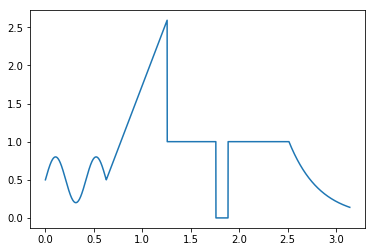

In [2]:
#1.a) Arbitrary Frequency Response
#import csv data
import numpy as np
import matplotlib.pyplot as plt
arb = np.loadtxt("arb_freq_resp.csv", delimiter = ",")
x = np.linspace(0,np.pi,len(arb))
plt.plot(x,arb)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


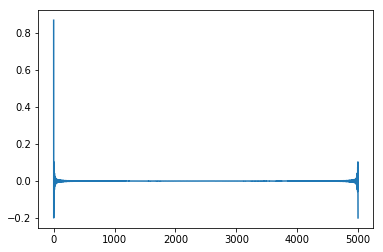

In [3]:
#b) IDFT to get a function in time domain
arb1 = np.fft.ifft(arb)
plt.plot(arb1)
plt.show()

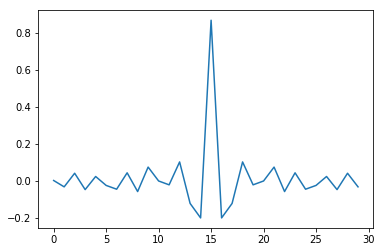

In [4]:
#c) make a M=30 filter kernal
#15 from fornt 15 from behind
filt = [0.0]*30
n= len(arb1)-15
i = 0
while n < len(arb1):
    filt[i] = arb1[n]
    n+=1
    i+=1
n = 0
while n < 15:
    filt[i] = arb1[n]
    n+=1
    i+=1

plt.plot(filt)
plt.show()
#looks like a sinc function

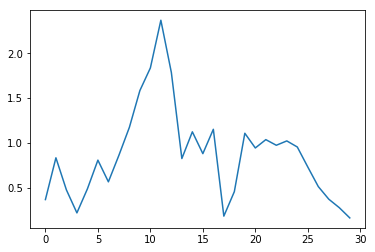

In [5]:
#d) 
arb2 = np.fft.fft(filt)
#needs abs
plt.plot(np.abs(arb2))
plt.show()
#looks kind of right but lacks details

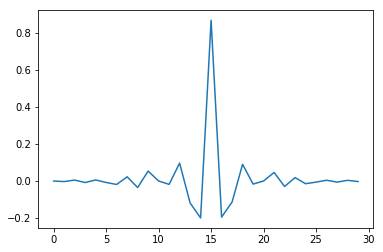

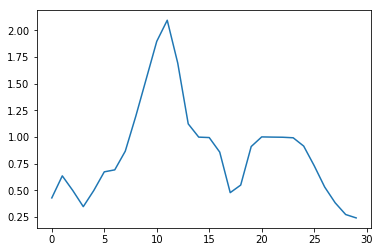

In [6]:
#e) apply hamming window then DFT

def Hamming(N):
    m = [0]*N
    n = 0
    while n <N:
        m[n] = 0.54 - 0.46*np.cos(2*np.pi*n/(N-1))
        n+=1
    return m
#N = 30
Ham = Hamming(30)
#apply window to filter
filt1 = [0.0]*30
n = 0
while n < len(Ham):
    filt1[n]=Ham[n]*filt[n]
    n+=1

plt.plot(filt1)
plt.show()
#DFT of windowed filtered
arb3 = np.fft.fft(filt1)
#needs abs
plt.plot(np.abs(arb3))
plt.show()
#smoothed out sharped edges

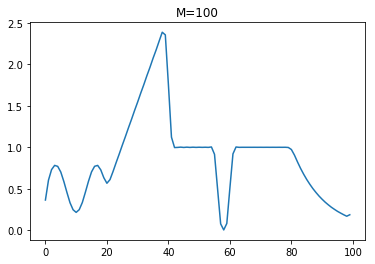

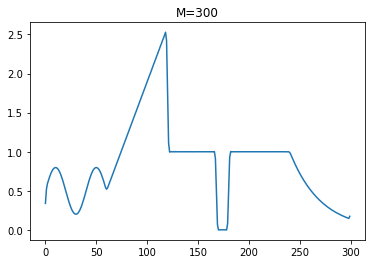

In [7]:
#f)try different Ms
M = 100
filt = [0.0]*M
n= len(arb1)-(M//2)
i = 0
while n < len(arb1):
    filt[i] = arb1[n]
    n+=1
    i+=1

n = 0
while n < (M/2):
    filt[i] = arb1[n]
    n+=1
    i+=1
    
Ham = Hamming(M)
#apply window to filter
filt1 = [0.0]*M
n = 0
while n < len(Ham):
    filt1[n]=Ham[n]*filt[n]
    n+=1
arbf = np.fft.fft(filt1)
plt.title("M=100")
plt.plot(np.abs(arbf))
plt.show()

#M=300
M = 300
filt = [0.0]*M
n= len(arb1)-(M//2)
i = 0
while n < len(arb1):
    filt[i] = arb1[n]
    n+=1
    i+=1
n = 0
while n < (M/2):
    filt[i] = arb1[n]
    n+=1
    i+=1
Ham = Hamming(M)
#apply window to filter
filt1 = [0.0]*M
n = 0
while n < len(Ham):
    filt1[n]=Ham[n]*filt[n]
    n+=1
arbf = np.fft.fft(filt1)
plt.title("M=300")
plt.plot(np.abs(arbf))
plt.show()
#the higher the M the more colosely we get to the desired freq reponsed

In [8]:
#g)
#the windowing help smooth out the ringing in the funtions
#increasing the M Increase the resolution and make the funtion closer to desired

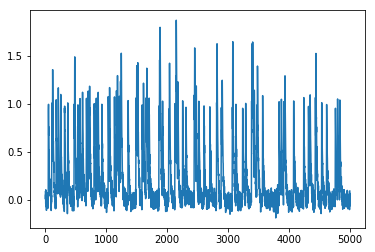

5000


In [9]:
#2.a)import the simulated gamma data
gamma = np.loadtxt("gamma_data.csv", delimiter = ",")
plt.plot(gamma)
plt.show()
print(len(gamma))

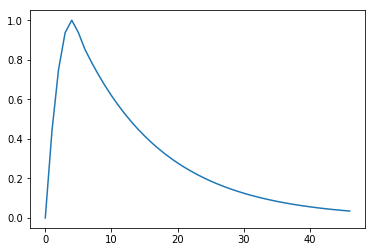

47


In [10]:
#b)detected import
det = np.loadtxt("detected.csv", delimiter = ",")
plt.plot(det)
plt.show()
print(len(det))

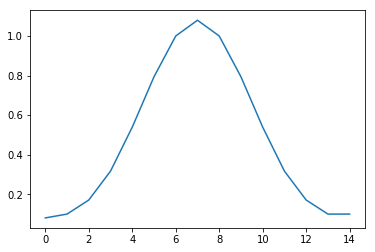

15


In [11]:
#c)desired import
des = np.loadtxt("desired.csv", delimiter = ",")
plt.plot(des)
plt.show()
print(len(des))

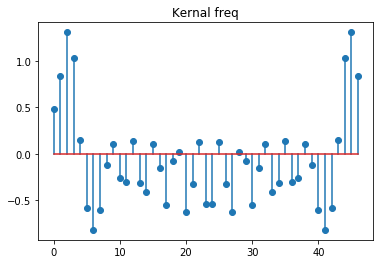

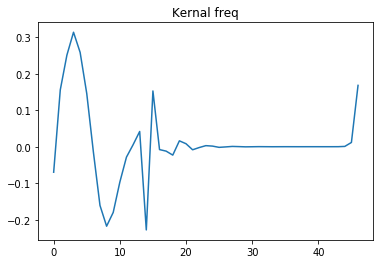

In [12]:
#d) make kernel with dft of desired and determine
#pad the shoter one with zeros
pdes = [0.0]*len(det)
n = 0
while n < len(des):
    pdes[n]=des[n]
    n+=1
#get the DFT
fdes = np.fft.fft(pdes)
fdet = np.fft.fft(det)
#find the freq domain ver of kernal
fker = [0.0]*len(det)
n= 0
while n <len(det):
    fker[n]=fdes[n]/fdet[n]
    n+=1
plt.title("Kernal freq")
plt.stem(fker)
plt.show()
#found kernerl in time domain
ker = np.fft.ifft(fker)
plt.title("Kernal freq")
plt.plot(ker)
plt.show()

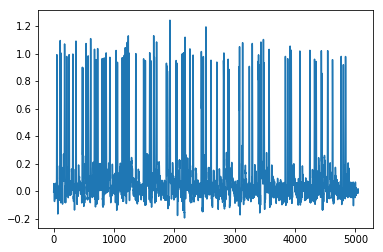

280


In [13]:
#e) convole to find true gamma
tgamma = np.convolve(gamma,ker)
plt.plot(tgamma)
plt.show()
#look like it works alright
#location of impules
loc = []
n = 0
while n < len(tgamma):
    if(tgamma[n]> 0.8):
        loc.append(n)
    n+=1
print(len(loc))
#around 280 impulese

In [14]:
#3.use the fox wav file
import IPython
from scipy.io import wavfile
plt.figure(figsize=(16,4))
fs, data = wavfile.read("fox.wav") #fs is the sampling rate
fox = data[:,0] # Left Channel
print(1100000/fs)


24.94331065759637


<Figure size 1152x288 with 0 Axes>

In [22]:
#a) create filters with sinc 41 with 258 samaples DFT
def low_sinc(length):
    #using np.sinc funtion to generate sinc linit -pi to pi
    #should be odd and large to give good resolution
    x = np.linspace(-4,4, num =length)
    sinc = np.sinc(x)
    norm = np.sum(sinc)
    i = 0
    out = [0]*length
    
    while i < length:
        out[i]=sinc[i]/norm
        i+=1
    
    return out
sinc = low_sinc(41)

sincfilt = [0]*258
n = 0
while n < len(sinc):
    sincfilt[n] = sinc[n]
    n+=1
#DFT of the sinc
fsincfilt = np.fft.fft(sincfilt)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Run time: 0.304 s


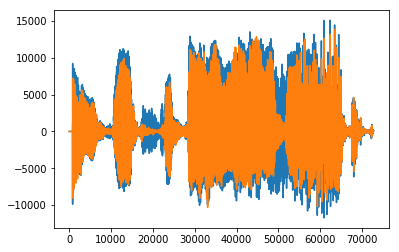

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Run time: 0.006 s


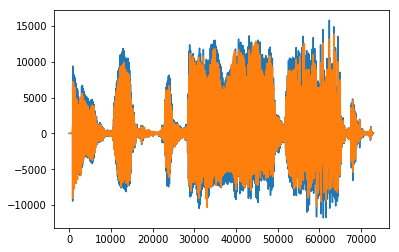

In [23]:
#b) spilt the fox wave to get DFTs
import time
time_start = time.clock()
#run your code
end = len(fox)//128
#final out
out = [0]*(len(fox))#extra zeros
n = 0
while n+2 < end:
    #setup outputs
    out1=[0]*256
    out2=[0]*256
    #setup steps
    step1=[0]*256
    step2=[0]*256
    #ins of function
    in1=fox[(0+128*n):(128+128*(n+1))]
    in2=fox[(0+128*(n+1)):(128+128*(n+2))]
    #pad with zeros
    i = 0
    while i < 128:
        step1[i] = in1[i]
        step2[i] = in2[i]
        i+=1
    #do the DFT of padded segment
    out1 = np.fft.fft(step1)
    out2 = np.fft.fft(step2)
    #apply the filter
    filtered1=[0]*256
    filtered2=[0]*256
    #filtered the output
    k = 0
    while k < 256:
        filtered1[k]=fsincfilt[k]*out1[k]
        filtered2[k]=fsincfilt[k]*out2[k]
        k+=1
    #IDFT
    final1 = np.fft.ifft(filtered1)
    final2 = np.fft.ifft(filtered2)
    #sum the finals into out shifted
    j = 0 
    while j < 256:
        if(j<128):
            out[128*n+j]=final1[j]
        else:
            out[128*n+j]=final1[j]+final2[j-128]
        j+=1
    n+=1    
time_elapsed = (time.clock() - time_start)
print("Run time: %5.3f s" % time_elapsed)
plt.plot(fox)
plt.plot(out)
plt.show()

time_start = time.clock()
test = np.convolve(fox,sincfilt)
time_elapsed = (time.clock() - time_start)
print("Run time: %5.3f s" % time_elapsed)
plt.plot(test)
plt.plot(out)
plt.show()
#the segment gives out almost the same graph as the direct with slight differences
#our methode takes longer time compared to direct, when we timed it.
#due to the fact for the lab of recording we prposely shortned the wave file to save time.
#the ssgment methode isn't as effective

In [24]:
import numpy as np
import math
def low_pass(signal,fc,reverse = False):
    #find x frist
    x = math.exp(-2*np.pi*fc)
    out = [0.0]*len(signal)
    # a and b
    a0 = 1-x
    b1= x
    # aplly filter
    if(reverse == False):
        n = 0
        while n < len(signal):
            out[n]= a0*signal[n]
            if(n-1 >= 0):
                out[n]= out[n] + b1*out[n-1]
            n+=1
    if(reverse == True):
        n = len(signal)-1
        while n >=0:
            out[n]= a0*signal[n]
            if(n+1 <= len(signal)-1):
                out[n]= out[n] + b1*out[n+1]
            n-=1
    return out
#print(fs,len(fox))

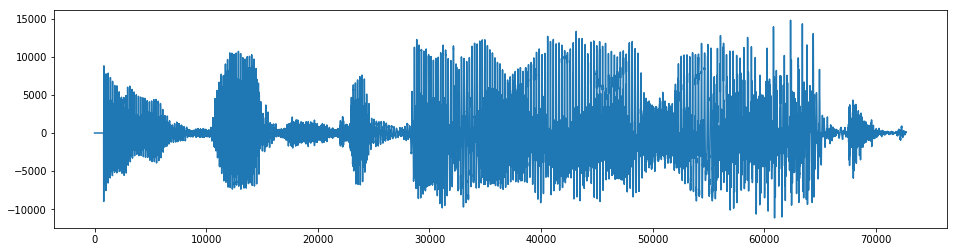

In [44]:
#filter the signals
fc = 4000/fs
filout = low_pass(fox,fc)
plt.figure(figsize=(16,4))
plt.plot(filout)
plt.show()

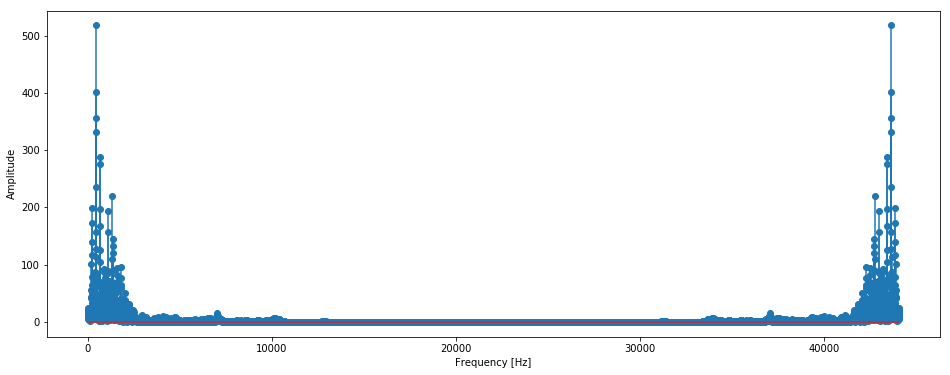

Run time: 47.188 s


In [51]:
#DFT of the filtered signals
import time
time_start = time.process_time()

fft = np.fft.fft(filout[:10000]) 
N = len(filout[:10000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
#plt.xlim(0,2500)
plt.stem(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

In [89]:
#b)modulate the wave
modout=[5]*len(filout)
fo=fs*25 #carrier freq
n=0
while n < len(filout):
    modout[n] = filout[n]*2*np.cos(2*np.pi*fo*n/fs)#fc=f0/fs
    n+=1
print(fs*25)

1102500


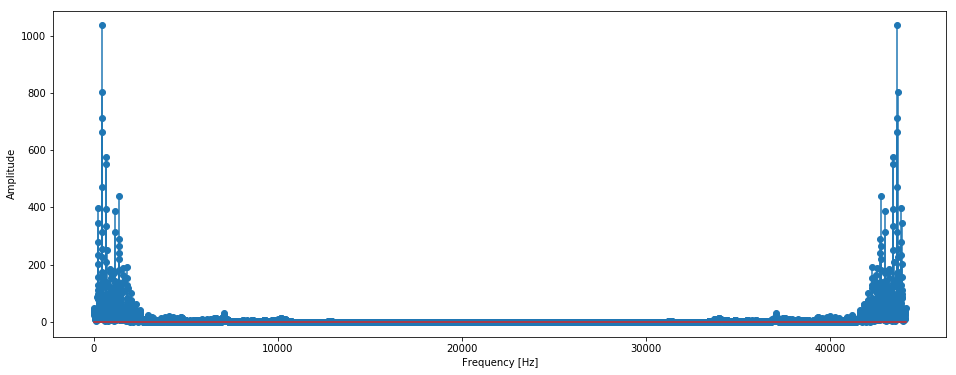

Run time: 102.969 s


In [88]:
#c)DFT of modulate the wave
time_start = time.process_time()

fft = np.fft.fft(modout[:10000]) #selecting range to reduce calc time
N = len(modout[:10000])
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
#plt.xlim(0,2500)
plt.stem(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
#looks about right

In [90]:
#d)
cafox = np.asarray(modout,dtype=np.int16)
wavfile.write("carriedfox.wav",fs,cafox)
IPython.display.Audio("carriedfox.wav")
#understood the wav